# Projeto de Técnicas de Programação em Python - Transformação de Áudio

<div align="center">
<img style="display: block; margin:auto; width: 50%;" src="assets/top10.jpg">
</div>

O presente projeto tem como premissa a manipulação de conteúdos de áudio. Para o estudo, foi decidido utilizar o Top 10 Mundial do Spotift como base. O foco será extrair dados relevantes referenets a cada faixa de áudio, como titulo, artista, quantidade de bits e por ai vai.

 Considerando as características intrinsecas de cada uma das músicas, seria preciso adquirir o dado diretamente da fonte, seja por CD ou outra mídia. Pela viabilidade,foi utilizado o https://spotifydown.com/pt para extrair músicas do Spotify apenas para fins didáticos.

# Indice


# 1. Bibliotecas


## 1.1. instalação para Colab


Essas bibliotecas normalmente não estão presentes no Colab. Por isso, os !pip foram separados. Mas, caso qualquer outra biblioteca não esteja presente, é só aplicar o !pip install nome-da-biblioteca.

In [ ]:
!pip install mutagen

In [ ]:
!pip install pydub

In [ ]:
!pip install librosa

## 1.2. Importação de Bibliotecas

Algumas bibliotecas de uso geral serão utilizadas para o projeto:

- OS: Utilizado para encontrar e, posteriormente, iterar a lista de áudios
- Numpy: Potente biblioteca para trabalhar conjuntos de dados, será utilizado para reduzir a potência do áudio
- Pandas: Criação das tabelas ou dataframes
- Matplotlib: Criação de gráficos


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A seguir, temos as bibliotecas de áudio, cada uma com uma função diferente:

- Pydub: Conversão do áudio de MP3 para WAV
- Mutagen: Leitura do arquivo em MP3 e extração de caracteristicas da faixa (Tags, Sample Rate etc.)
- IPython: Reprodutor de audio para tocar no notebook
- Librosa: Biblioteca com muitas funcionalidades para compreensão de Áudio, mas o foco é descobrir o Beat per Minute
- Scipy: Leitura de WAVpara trabalhar com a faixa

In [ ]:
from mutagen.mp3 import MP3
from pydub import AudioSegment
from IPython.display import Audio
import librosa
import scipy.io.wavfile as wav

# 2. Caracteristicas do Áudio Original

## 2.1. Importação da faixa em MP3

In [10]:
# Importação do arquivo pelo mutagem para tirar quase todas as caracteristicas
audio_path = 'audios/9_La_Diabla.mp3'
audio = MP3(audio_path)

In [17]:
# importação do arquivo em Librosa para encontrar o BPM
y, sr = librosa.load(audio_path)
bpm, bf = librosa.beat.beat_track(y=y, sr=sr)


## 2.2. Demonstração das informações da faixa

In [19]:
# Para saber as informações das tags, é possivel usar o audio.keys para descobrir (testei uma a uma nesse caso*)
for tag in audio.keys():
    print(f"{tag}: {audio.get(tag)}")
    

TIT2: La Diabla
TPE1: Xavi
TALB: La Diabla
COMM:n:eng: Converted by https://spotifydown.com
APIC:Cover of La Diabla by Xavi: APIC(encoding=<Encoding.LATIN1: 0>, mime='image/jpeg', type=<PictureType.COVER_FRONT: 3>, desc='Cover of La Diabla by Xavi', data=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x01,\x01,\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [20]:
# Encontrando o Título, nome do Artista e Ano
titulo = str(audio.get("TIT2"))
artista = str(audio.get("TPE1"))
album = str(audio.get("TALB"))
ano = str(audio.get("TDRC"))


print(f"Título: {titulo}")
print(f"Artista: {artista}")
print(f"Album: {album}")
print(f"Ano: {ano}")

Título: La Diabla
Artista: Xavi
Album: La Diabla
Ano: 2023


In [21]:
# Outras características de cada áudio
print(f'Duração: {audio.info.length} s')
print(f'BPM: {round(bpm,3)}')
print(f'Taxa de bits: {audio.info.bitrate} bits/s')
print(f'Frequência de amostragem: {audio.info.sample_rate} Hz')
print(f'Número de canais: {audio.info.channels}')

Duração: 172.296 s
BPM: 129.199
Taxa de bits: 320000 bits/s
Frequência de amostragem: 48000 Hz
Número de canais: 2


## 2.3. Função para extração das informações da faixa

A função vai pegar o caminho do áudio e fazer toda a extração de dados para uma lista, sendo essa lista retornada.

In [23]:
def extracao_dados_faixa(path):
    faixa = []
    
    audio = MP3(path)

    y, sr = librosa.load(path)
    bpm, bf = librosa.beat.beat_track(y=y, sr=sr)
    

    titulo = str(audio.get("TIT2"))
    artista = str(audio.get("TPE1"))
    album = str(audio.get("TALB"))
    ano = int(str(audio.get("TDRC")))

    duracao = audio.info.length
    taxa_bits = audio.info.bitrate
    frequencia = audio.info.sample_rate
    numero_canais = audio.info.channels

    faixa += [titulo, artista, album, ano, duracao, round(bpm,3), taxa_bits, frequencia, numero_canais]

    return faixa

In [24]:
print(extracao_dados_faixa(audio_path))

['La Diabla', 'Xavi', 'La Diabla', 2023, 172.296, 129.199, 320000, 48000, 2]


# 3. Transformação dos dados das músicas em um dataframe

## 3.1. Extração dos caminhos para futura iteração

A ideia aqui abaixo é entrar no diretório em que estão todas as faixas e criar uma lista com o endereço de cada uma das faixas.

In [25]:
# Aqui eu crio uma variável diretório para conseguir acessar mais facilmente a pasta
diretorio = 'audios/'

lista_audios = os.listdir(diretorio)

## 3.2. Aplicação da função

A função criada no 2.3. será aplicada aqui, iterando cada um dos elementos da lista criada anterior:

In [26]:
# lista vazia para preenchimento do laço FOR
todas_faixas = []

# Laço FOR para cada arquivo presente no diretório
for arquivo in lista_audios:
    if ".mp3" in arquivo:
        caminho_audio = os.path.join(diretorio, arquivo)

        # Chamada da função para retirar todos esses dados do 2.1. de uma vez
        todas_faixas.append(extracao_dados_faixa(caminho_audio))

Agora, com a variável todas_faixas criadas, é possivel construir o dataframe.

## 3.3. Criação do Dataframe

Primeiro, será criada uma lista com todos os nomes dos atributos:

In [ ]:
colunas = ["titulo", "artista","album", "ano", "duracao", "bpm", "taxa_bits", "frequencia", "numero_canais"]

Segundo, será criado o dataframe utilizando os dados coletados das 10 faixas:

In [30]:
top_10_musicas_df = pd.DataFrame(data=todas_faixas, columns=colunas)
top_10_musicas_df

,titulo,artista,album,ano,duracao,bpm,taxa_bits,frequencia,numero_canais
0,Beautiful Things,Benson Boone,Beautiful Things,2024,180.336,107.666,320000,48000,2
1,CARNIVAL,¥$/Kanye West/Ty Dolla $ign/Rich The Kid/Playb...,VULTURES 1,2024,264.360,151.999,320000,48000,2
2,End of Beginning,Djo,DECIDE,2022,159.288,161.499,320000,48000,2
3,greedy,Tate McRae,greedy,2023,129.720,112.347,320000,48000,2
4,Cruel Summer,Taylor Swift,Lover,2019,178.464,112.347,320000,48000,2
5,Lose Control,Teddy Swims,I've Tried Everything But Therapy (Part 1),2023,210.720,161.499,320000,48000,2
6,TEXAS HOLD 'EM,Beyoncé,TEXAS HOLD 'EM,2024,235.680,112.347,320000,48000,2
7,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Weeknd/JENNIE/Lily-Rose Depp,The Highlights (Deluxe),2024,244.728,172.266,320000,48000,2
8,My Love Mine All Mine,Mitski,The Land Is Inhospitable and So Are We,2023,137.808,112.347,320000,48000,2
9,La Diabla,Xavi,La Diabla,2023,172.296,129.199,320000,48000,2


## 4. Outras transformações de áudio

## 4.1. Conversão do áudio de MP3 para WAV

Como o Numpy trabalha melhor com WAV, por ser um arquivo de áudio sem camada de compactação, será feita a conversão de tipo.

**ALERTA**: No Colab, o Pydub funciona perfeitamente. Por isso, aconselho importar esse notebook para o Colab para facilitar. Porém como os arquivos de áudio e assets estão no GitHub, é preciso dar upload neles também.

Mas, para a conversão do áudio, foi preciso fazer o download do ffmpeg, um framework de multimedia que permite o Pydub fazer a conversão de MP3 para WAV. 

- Para fazer o download do ffmpeg, aqui está o [link](https://www.ffmpeg.org/download.html). 
- Para fazer a instalação via PATH pode usar esse [wikihow](https://pt.wikihow.com/Instalar-o-FFmpeg-no-Windows).

Inclusive, aqui será feita apenas uma demonstração com uma das músicas incluidas.

In [7]:
# conversão de audios em wav para poder trabalhar o numpy
mp3_file = AudioSegment.from_mp3("audios/9_La_Diabla.mp3")

# Exporta para WAV após a reprodução
mp3_file.export("audios/wav/9.wav", format="wav")

<_io.BufferedRandom name='audios/wav/9.wav'>

## 4.2. Leitura do arquivo WAV

Scipy terá a função de ler o arquivo em audio_data para poder trabalhar como se fosse um array Numpy.

In [33]:
# Separação do rate (numero de amostras por segundo em Hertz) e do arquivo de som
rate, audio_data = wav.read('audios/wav/9.wav')

In [34]:
print(type(audio_data))

<class 'numpy.ndarray'>


Utilizando o Numpy, é possivel atenuar a potência das ondas sonoras, como no exemplo abaixo:

In [ ]:
# Transformação para diminuição da força do som
f_trans = np.poly1d([1], True)

## 4.3. Definição do Sample 

O sample é um corte da música, uma amostra literalmente, que pode ser utilizada para diversos fins. É bastante utilizado para criação de novas músicas, por exemplo.

Porém, aqui neste notebook, ele será apenas utilizado para diminuir o tamanho da faixa e facilitar a leitura posterior e a visualização.

In [ ]:
# definção dos 20 segundos iniciais, para deixar o arquivo mais leve e fácil de ler
segundos = 10

# Rate * Segundos para capturar os 20 segundos de interesse
sample = segundos * rate

In [9]:
# Corte do sample, tanto do WAV original quanto do alterado, para facilitar a leitura do arquivo
audio_data_segundos = np.convolve(audio_data[:sample, 0], True)
audio_final_segundos = np.convolve(audio_data[:sample, 0], f_trans, mode='full')

In [10]:
# Escrita do arquivo final, apenas o sample
wav.write('audios/wav/9_final.wav', rate, np.int16(audio_final_segundos))

## 4.4. Tocar o Sample

Agora, é possivel tocar ambos os samples, evitando que o peso da música trave o notebook.

In [11]:
# Exemplo do áudio WAV primário
Audio(audio_data_segundos, rate=rate)

In [12]:
# Exemplo do áudio WAV alterado
Audio(audio_final_segundos, rate=rate)

## 4.5. Tocar o Sample

Com isso, será possivel fazer a geração do gráfico comparativo entre as 2 ondas sonoras utilizando o Matplotlib como base.

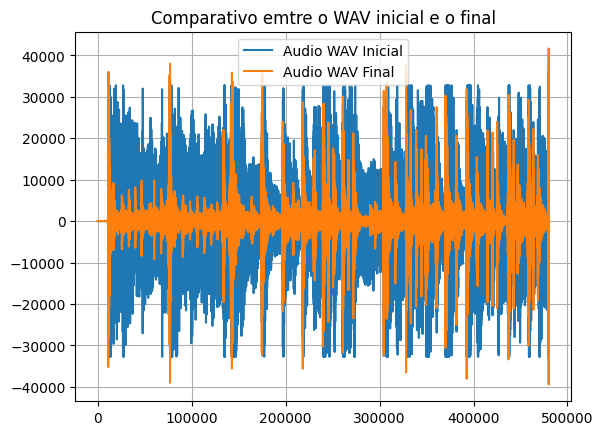

In [13]:
# Criação de cada uma das ondas sonoras
plt.plot(audio_data_segundos, label = "Audio WAV Inicial")
plt.plot(audio_final_segundos, label = "Audio WAV Final")

# Título, grade de fundo, ativação da legenda e mostrar o gráfico
plt.title("Comparativo emtre o WAV inicial e o final")
plt.grid()
plt.legend()
plt.show()